In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re

In [2]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score
from scipy.stats import ks_2samp
from Fonctions import fit_and_print
from imblearn.over_sampling import SMOTE

In [4]:
df_feat = pd.read_excel("/Users/user/Documents/Projet_Covid/Data/df_cleared.xlsx")
df_feat.head()

,Unnamed: 0,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
0,1,126e9dd13932f68,17,0,0,0,0,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,1
1,8,8bb9d64f0215244,1,0,0,1,0,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,0
2,15,6c9d3323975b082,9,0,0,0,0,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759,-1.067355,1
3,18,d3ea751f3db9de9,11,0,0,0,0,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,1
4,22,2c2eae16c12a18a,9,0,0,0,0,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129,0.613318,0


In [5]:
df_feat = df_feat.iloc[: , 1:]

In [6]:
df_feat

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
0,126e9dd13932f68,17,0,0,0,0,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,1
1,8bb9d64f0215244,1,0,0,1,0,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,0
2,6c9d3323975b082,9,0,0,0,0,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759,-1.067355,1
3,d3ea751f3db9de9,11,0,0,0,0,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,1
4,2c2eae16c12a18a,9,0,0,0,0,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129,0.613318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,c5b44ff9c7782fd,19,0,0,0,0,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,0.892207,-0.474754,1.066653,0.347948,0
598,88cce1444e16f9c,19,0,0,0,0,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-0.540532,-1.976971,1.670707,0.967144,0
599,2733fac0d3f7138,15,0,0,0,0,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,-0.709090,0.005955,0.909074,-1.155812,0
600,acd761fe16b5d0f,17,0,0,0,0,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,-0.582671,1.408024,1.381812,-0.448160,0


In [7]:
df_feat.shape

(602, 18)

In [8]:
features = [c for c in df_feat.columns if c not in ['Patient ID', 'SARS-Cov-2 exam result',
                                                   'Patient addmited to regular ward (1=yes, 0=no)',
                                                   'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                   'Patient addmited to intensive care unit (1=yes, 0=no)']]


# Metrics Selection

It's a binary classification, so we're going to focus on 2 metrics: accuracy, to ensure the precision of the classification, and recall, to focus on the model's ability to identify true positives among the model's positive elements. We'll work by prioritizing a compromise between accuracy and recall as a desirable performance.


# Models

## Random Forest

In [10]:
X = df_feat[features]
y = df_feat['SARS-Cov-2 exam result'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Split between test and train!")

#Apply RF
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)  
fit_and_print(rf,X_train,X_test,y_train,y_test)

Split between test and train!
Confusion Matrix: 
 [[101   3]
 [ 11   6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       104
           1       0.67      0.35      0.46        17

    accuracy                           0.88       121
   macro avg       0.78      0.66      0.70       121
weighted avg       0.87      0.88      0.87       121

Accuracy Score:  0.8842975206611571
Recall Score: 0.35294117647058826
AUC:  0.6620475113122172
KS:  0.3240950226244344


We observe a precision of 89%, which is quite good, but the recall score is 35%, which is relatively low, since it indicates, along with the f1-score, whether there is a high proportion of false positives or false negatives. As the precision is satisfactory, we'll try to improve the recall score using a randomsearch and then a gridsearch on the hyper-parameters.
Another important point is that the test set is quite small, which raises questions about the generalizability of the model.

In [ ]:
random_grid = {'n_estimators': [50, 100, 200, 500],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [2, 8, 16, 32, 64],
            'min_samples_split': [1,2,8,16,24],
            'min_samples_leaf': [1,2,5,10,15,30]}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                            n_iter = 200, cv = 5, scoring = 'recall', 
                            verbose=0, random_state=42, n_jobs = -1)

# Fit the random search model
fit_and_print(rf_random,X_train,X_test,y_train,y_test)
print(rf_random.best_params_)

On n'améliore le recall au détrimennt de l'accuracy maintenant voyons ce que le gridsearch donne

In [86]:
gridsearch_grid = {'n_estimators': [10, 50, 100, 200, 500],
            'max_features': ['auto', 'sqrt', 'log2', 5, 10, 30],
            'max_depth': [2, 8, 16, 32, 64, 128],
            'min_samples_split': [1,2,4,8,16,24],
            'min_samples_leaf': [1,2,5,10,15,30]}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(
 estimator=rf, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring='recall',
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(rf_random,X_train,X_test,y_train,y_test)
print(rf_random.best_params_)

C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5

Confusion Matrix: 
 [[99  5]
 [10  7]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       104
           1       0.58      0.41      0.48        17

    accuracy                           0.88       121
   macro avg       0.75      0.68      0.71       121
weighted avg       0.86      0.88      0.87       121

Accuracy Score:  0.8760330578512396
Recall Score: 0.4117647058823529
AUC:  0.6818438914027148
KS:  0.36368778280542985
{'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 30, 'max_depth': 8}


Le gridsearch fait un travail simimaore au random search  le recall est améliorés,cependant l'amélioration est moindre, à noter qu'il est possible d'améliorer encore la recherche d'hyperparmètres nottament en utilisant la bibliothèque hyperopt(TPE,...), Par la suite on ne considérera uniquement le gridsearch étant donné que c'est certainement plus précis dans la majorité des cas

Pour rééquilibrer les données et obtenir de meilleur résultats nous allons utiliser le SMOTE :

Le SMOTE, acronyme pour Synthetic Minority Oversampling Technique, est une méthode de suréchantillonnage des observations minoritaires. Pour éviter de réaliser un simple clonage des individus minoritaires, le SMOTE se base sur un principe simple : générer de nouveaux individus minoritaires qui ressemblent aux autres, sans être strictement identiques. Cela permet de densifier de façon plus homogène la population d’individus minoritaires.

C’est sur ces données transformées, auxquelles on a ajouté de faux individus synthétiques, que l’on va ensuite entraîner un modèle de Machine learning.

## SMOTE

In [87]:
smt = SMOTE(k_neighbors=5, random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

np.bincount(y_train)

array([415, 415], dtype=int64)

Nouvel entrainement du random forest

In [88]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=42)  
fit_and_print(rf,X_train,X_test,y_train,y_test)

Confusion Matrix: 
 [[99  5]
 [ 6 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       104
           1       0.69      0.65      0.67        17

    accuracy                           0.91       121
   macro avg       0.82      0.80      0.81       121
weighted avg       0.91      0.91      0.91       121

Accuracy Score:  0.9090909090909091
Recall Score: 0.6470588235294118
AUC:  0.7994909502262443
KS:  0.5989819004524887


C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Le recall est améliorer testons avec le gridsearch désormais

In [89]:
gridsearch_grid = {'n_estimators': [10, 50, 100, 200, 500],
            'max_features': ['auto', 'sqrt', 'log2', 5, 10, 30],
            'max_depth': [2, 8, 16, 32, 64, 128],
            'min_samples_split': [1,2,4,8,16,24],
            'min_samples_leaf': [1,2,5,10,15,30]}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(
 estimator=rf, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring='recall',
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(rf_random,X_train,X_test,y_train,y_test)
print(rf_random.best_params_)

Confusion Matrix: 
 [[99  5]
 [ 6 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       104
           1       0.69      0.65      0.67        17

    accuracy                           0.91       121
   macro avg       0.82      0.80      0.81       121
weighted avg       0.91      0.91      0.91       121

Accuracy Score:  0.9090909090909091
Recall Score: 0.6470588235294118
AUC:  0.7994909502262443
KS:  0.5989819004524887
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 16}


C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5

On obtiens 65% de recall et un AUC qui se rapproche de 1 de plus l'accuracy est de 91% ce qui commence à être pas mal, voyons si d'autres modèles peuvent mieux performer

## Regression logistique

In [90]:
gridsearch_grid = {
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
    'max_iter': [100, 500, 1000, 5000]
    
    }
lr = LogisticRegression()

lr_random =  GridSearchCV(
 estimator=lr, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring='recall',
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(lr_random,X_train,X_test,y_train,y_test)
print(lr_random.best_params_)

Confusion Matrix: 
 [[90 14]
 [ 5 12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.90       104
           1       0.46      0.71      0.56        17

    accuracy                           0.84       121
   macro avg       0.70      0.79      0.73       121
weighted avg       0.88      0.84      0.86       121

Accuracy Score:  0.8429752066115702
Recall Score: 0.7058823529411765
AUC:  0.785633484162896
KS:  0.5712669683257918
{'C': 100, 'max_iter': 100, 'penalty': 'l2'}


C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bounadja Bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n


Très similaire à RF, mais un recall amélioré

## KNN

In [91]:
gridsearch_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn = KNeighborsClassifier()

knn_random = GridSearchCV(
 estimator=knn, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring='recall',
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(knn_random,X_train,X_test,y_train,y_test)
print(knn_random.best_params_)

Confusion Matrix: 
 [[74 30]
 [ 6 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.71      0.80       104
           1       0.27      0.65      0.38        17

    accuracy                           0.70       121
   macro avg       0.60      0.68      0.59       121
weighted avg       0.83      0.70      0.74       121

Accuracy Score:  0.7024793388429752
Recall Score: 0.6470588235294118
AUC:  0.6792986425339367
KS:  0.3585972850678733
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


Sous performant par rapport aux modèles précédents

## SVM

NB. Le gridsearch étant trop long j'ai fonctionné à taton pour trouver les hyperparamètres ci dessous

In [92]:
gridsearch_grid = {'C': [ 1, ], 
               'gamma': [ 1], 
               'kernel': ['linear']}  

svc = SVC()

svc_random = GridSearchCV(
 estimator=svc, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring='recall',
 verbose=1,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(svc_random,X_train,X_test,y_train,y_test)
print(svc_random.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Confusion Matrix: 
 [[85 19]
 [ 4 13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       104
           1       0.41      0.76      0.53        17

    accuracy                           0.81       121
   macro avg       0.68      0.79      0.71       121
weighted avg       0.88      0.81      0.83       121

Accuracy Score:  0.8099173553719008
Recall Score: 0.7647058823529411
AUC:  0.7910067873303167
KS:  0.5820135746606335
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


Le recall est amélioré mais au détriment de l'accuracy

## XGB Classifier

In [93]:
import xgboost as xgb

gridsearch_grid = {"n_estimators": [100, 500, 1000],
             "learning_rate": [0.1, 0.05, 0.01],
              "max_depth": [2, 8, 16, 64, 128], 
              "colsample_bytree": [0.3, 0.8, 1],
              "gamma": [0,1,5]}  

xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

xgb_random = GridSearchCV(
 estimator=xgb_clf, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring='recall',
 verbose=1,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(xgb_random,X_train,X_test,y_train,y_test)
print(xgb_random.best_params_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Confusion Matrix: 
 [[95  9]
 [ 6 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       104
           1       0.55      0.65      0.59        17

    accuracy                           0.88       121
   macro avg       0.75      0.78      0.76       121
weighted avg       0.89      0.88      0.88       121

Accuracy Score:  0.8760330578512396
Recall Score: 0.6470588235294118
AUC:  0.7802601809954751
KS:  0.5605203619909502
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 16, 'n_estimators': 100}


Trés similaire a Rf peut etre qu'une meilleur optimisation des hyperparamètres pourrait lui permettre de mieux performer

## CatBoost

In [94]:
import catboost

gridsearch_grid =  {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

cat_clf=catboost.CatBoostClassifier(loss_function='Logloss')


cat_random = GridSearchCV(
 estimator=cat_clf, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring='recall',
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(cat_random,X_train,X_test,y_train,y_test)
print(cat_random.best_params_)


0:	learn: 0.6382612	total: 7.21ms	remaining: 353ms
1:	learn: 0.5996250	total: 32ms	remaining: 769ms
2:	learn: 0.5611019	total: 56.5ms	remaining: 886ms
3:	learn: 0.5297894	total: 80.9ms	remaining: 930ms
4:	learn: 0.4993351	total: 106ms	remaining: 955ms
5:	learn: 0.4749867	total: 130ms	remaining: 953ms
6:	learn: 0.4487797	total: 156ms	remaining: 958ms
7:	learn: 0.4264820	total: 157ms	remaining: 823ms
8:	learn: 0.4092829	total: 181ms	remaining: 826ms
9:	learn: 0.3913820	total: 205ms	remaining: 820ms
10:	learn: 0.3718392	total: 209ms	remaining: 741ms
11:	learn: 0.3556081	total: 234ms	remaining: 740ms
12:	learn: 0.3426455	total: 259ms	remaining: 738ms
13:	learn: 0.3286604	total: 285ms	remaining: 734ms
14:	learn: 0.3160225	total: 309ms	remaining: 722ms
15:	learn: 0.3046262	total: 310ms	remaining: 660ms
16:	learn: 0.2943760	total: 312ms	remaining: 606ms
17:	learn: 0.2828904	total: 337ms	remaining: 599ms
18:	learn: 0.2724769	total: 361ms	remaining: 589ms
19:	learn: 0.2629816	total: 386ms	remai

In [95]:
cat_clf=catboost.CatBoostClassifier(loss_function='Logloss',depth= 8, iterations= 100, l2_leaf_reg= 1, learning_rate= 0.1)
fit_and_print(cat_clf,X_train,X_test,y_train,y_test)
pd.set_option('display.max_columns', 500)

0:	learn: 0.6382612	total: 12.6ms	remaining: 1.24s
1:	learn: 0.5956860	total: 17ms	remaining: 834ms
2:	learn: 0.5585903	total: 22.3ms	remaining: 721ms
3:	learn: 0.5292091	total: 27ms	remaining: 647ms
4:	learn: 0.5016240	total: 32.1ms	remaining: 610ms
5:	learn: 0.4734406	total: 37.3ms	remaining: 584ms
6:	learn: 0.4508359	total: 41.5ms	remaining: 551ms
7:	learn: 0.4280642	total: 45.3ms	remaining: 521ms
8:	learn: 0.4075825	total: 49ms	remaining: 496ms
9:	learn: 0.3886563	total: 53.3ms	remaining: 480ms
10:	learn: 0.3713253	total: 54.9ms	remaining: 444ms
11:	learn: 0.3564637	total: 59ms	remaining: 432ms
12:	learn: 0.3445437	total: 60.1ms	remaining: 402ms
13:	learn: 0.3293206	total: 64.3ms	remaining: 395ms
14:	learn: 0.3156731	total: 68.5ms	remaining: 388ms
15:	learn: 0.3059344	total: 69.3ms	remaining: 364ms
16:	learn: 0.2952205	total: 73.2ms	remaining: 358ms
17:	learn: 0.2856841	total: 77.2ms	remaining: 352ms
18:	learn: 0.2802843	total: 78.2ms	remaining: 333ms
19:	learn: 0.2704921	total: 82

Peut etre qu'une meilleur optimisation des hyper paramètres pourrait donner un meilleur résultats mais faute de temps nous resterons sur ces résultats, le catboost améliore bien le recall tout en conservant une bonne accuracy

## Feature Importance

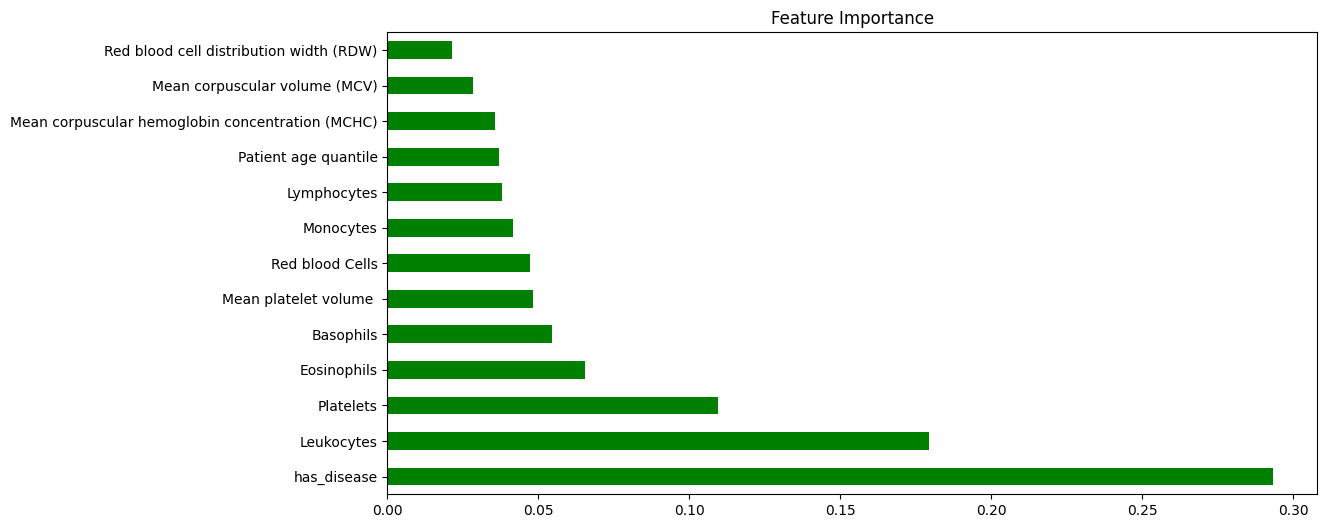

has_disease                                         29.335087
Leukocytes                                          17.952118
Platelets                                           10.950707
Eosinophils                                          6.540556
Basophils                                            5.453807
Mean platelet volume                                 4.815109
Red blood Cells                                      4.737771
Monocytes                                            4.157894
Lymphocytes                                          3.808469
Patient age quantile                                 3.714315
Mean corpuscular hemoglobin concentration (MCHC)     3.552099
Mean corpuscular volume (MCV)                        2.835381
Red blood cell distribution width (RDW)              2.146684
Name: importance, dtype: float32


In [96]:
feature_importances = pd.DataFrame(xgb_random.best_estimator_.feature_importances_,
                                index = features,
                                    columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(12,6))
feature_importances.importance.plot(kind='barh', color='green')
plt.title('Feature Importance')
plt.show()
feature_importances.style.format({'importance': '{:.1%}'.format})
print(feature_importances.importance*100)

In [97]:
df_feat

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
0,126e9dd13932f68,17,0,0,0,0,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,1
1,8bb9d64f0215244,1,0,0,1,0,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,0
2,6c9d3323975b082,9,0,0,0,0,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759,-1.067355,1
3,d3ea751f3db9de9,11,0,0,0,0,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,1
4,2c2eae16c12a18a,9,0,0,0,0,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129,0.613318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,c5b44ff9c7782fd,19,0,0,0,0,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,0.892207,-0.474754,1.066653,0.347948,0
598,88cce1444e16f9c,19,0,0,0,0,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-0.540532,-1.976971,1.670707,0.967144,0
599,2733fac0d3f7138,15,0,0,0,0,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,-0.709090,0.005955,0.909074,-1.155812,0
600,acd761fe16b5d0f,17,0,0,0,0,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,-0.582671,1.408024,1.381812,-0.448160,0


Les fonctionnalités les plus importantes sont très similaires à celles que nous avons vues sur la carte thermique de corrélation.

- Leucocytes
- Plaquettes
- has_disease
- Éosionophiles
- Volume plaquettaire moyen
- Monocytes


# Conclusion

Dans un premier temps nous avons fais un travail de nettoyage des données, à savoir que cette tâche est certinement la plus importante du projet étant donné qu'il y a beaucoup de valeurs absentes dans le dataframe cependant c'est assez représentatif de la réalité dans le cas de la prise en charge de patients. Les différentes stratégies adoptées afin de traiter ce problème ont été détaillée dans le notebook data_clearing, cependant on peut tout à fait considérer d'autres stratégies afin de conserver un maximum de données exploitables.

Pour ce qui est des performances des modèles elles ont pu être améliorer jusqu'a un certain seuil, on a nottament le catboost qui a le meilleur compromis accuracy recall, cependant il est important de noté que la base de test est très petite, il serait pertinent d'alimenter le modèle avec plus de données et d'etoffer la base de test pour voir si il se généralise bien a de nouvelles données.

Au niveau des features importance on identifie quelques paramètres très influent ce qui peut être interessant dans la mesure ou la collecte de donnée pourra être plus pertinente s'il on se base sur ces résultats